In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Customized Images

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_customization.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_customization.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_customization.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).

In this tutorial, you will learn how to use the Google Gen AI SDK for Python to generate customized images using few-shot learning with Imagen 3. You'll supply a text prompt and reference images to guide new image generation in the following styles:

- Subject customization
- Style transfer
- Style customization
- Controlled customization
  - Canny edge
  - Scribble

## Get started


### Install Google Gen AI SDK for Python


In [1]:
%pip install --upgrade --quiet google-genai opencv-python ipycanvas ipywidgets

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.6 which is incompatible.
ydata-profiling 4.17.0 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [ ]:
import sys

if "google.colab" in sys.modules:
    # Support for third party widgets
    from google.colab import auth, output

    auth.authenticate_user()
    output.enable_custom_widget_manager()

### Import libraries

In [2]:
import urllib

from IPython.display import display
from PIL import Image as PIL_Image
from google import genai
from google.genai.types import (
    ControlReferenceConfig,
    ControlReferenceImage,
    EditImageConfig,
    GenerateImagesConfig,
    Image,
    RawReferenceImage,
    StyleReferenceConfig,
    StyleReferenceImage,
    SubjectReferenceConfig,
    SubjectReferenceImage,
)
from ipycanvas import Canvas
from ipywidgets import Button
import matplotlib.pyplot as plt

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [3]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [4]:
os.environ

environ{'SHELL': '/bin/bash',
        'CONDA_EXE': '/opt/conda/bin/conda',
        '_CE_M': '',
        'VERTEX_PRODUCT': 'WORKBENCH_INSTANCE',
        'GRPC_FORK_SUPPORT_ENABLED': '0',
        'DL_ANACONDA_HOME': '/opt/conda',
        'FRAMEWORK_FILE_PATH': '/opt/deeplearning/metadata/framework',
        'GOOGLE_CLOUD_PROJECT': 'qwiklabs-gcp-04-fa706cf94cc6',
        'POST_STARTUP_SCRIPT_PATH': '/opt/c2d/post_start.sh',
        'DL_PATH_DEPS': '/opt/deeplearning/deps',
        'DL_BIN_PATH': '/opt/deeplearning/bin',
        'XML_CATALOG_FILES': 'file:///opt/conda/etc/xml/catalog file:///etc/xml/catalog',
        'KERNEL_LAUNCH_TIMEOUT': '598',
        'BINARIES_PATH': '/opt/deeplearning/binaries',
        'PWD': '/home/jupyter',
        'LOGNAME': 'jupyter',
        'CONDA_PREFIX': '/opt/conda',
        'JPY_SESSION_NAME': '/home/jupyter/genai114_imagen3_customization.ipynb',
        'TENSORBOARD_PROXY_URL': '/proxy/%PORT%/',
        'GOOGLE_CLOUD_REGION': 'us-central1',
        'PACK

### Define a helper function to display images

In [5]:
def display_images(generated_image, ref_image) -> None:
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    axis[0].imshow(generated_image)
    axis[0].set_title("Imagen 3")
    axis[1].imshow(ref_image)
    axis[1].set_title("Reference Image")
    for ax in axis:
        ax.axis("off")
    plt.show()

### Load the image models

Imagen 3 Customization: `imagen-3.0-capability-001`

Imagen 3 Generation: `imagen-3.0-generate-002`

In [6]:
customization_model = "imagen-3.0-capability-001"
generation_model = "imagen-3.0-generate-002"

### Subject customization - Edit/Customise Only

Few-shot prompting with Imagen 3 Customization supports the following subjects: 
* animal companion, 
* person, and 
* product. 

The following example demonstrates how to customize images of a person. To do this create 1 - 4 `SubjectReferenceImage` objects with the `subject_type` set to SUBJECT_TYPE_PERSON. 

For subject customization involving people you can also create a ```ControlReferenceImage``` with the `control_type` set to CONTROL_TYPE_FACE_MESH. Passing in a control reference image will allow you to better specify the **face position in the edited image**.

Next, draft a prompt for the new image and make sure to **reference the subject** in the prompt by **including brackets with the reference id you assigned to each reference image**.

When generating images you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
* `person_generation`: 
  * `DONT_ALLOW`, `ALLOW_ADULT`,`ALLOW_ALL`
* `safety_filter_level`:
  * `BLOCK_LOW_AND_ABOVE`, `BLOCK_MEDIUM_AND_ABOVE`, `BLOCK_ONLY_HIGH`, `BLOCK_NONE`

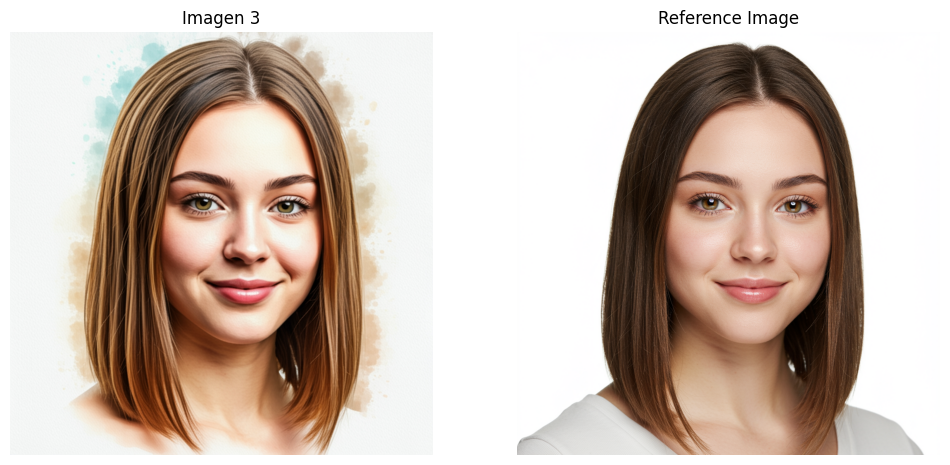

In [7]:
################################################################
# subject_image is used for the subject and control reference
################################################################
subject_image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/person.png")

subject_reference_image = SubjectReferenceImage(
    reference_id=1,
    reference_image=subject_image,
    config=SubjectReferenceConfig(
        subject_description="a headshot of a woman", subject_type="SUBJECT_TYPE_PERSON"
    ),
)

control_reference_image = ControlReferenceImage(
    reference_id=2,
    reference_image=subject_image,
    config=ControlReferenceConfig(control_type="CONTROL_TYPE_FACE_MESH"),
)
################################################################



prompt = "a portrait of a woman[1] in the pose of the control image[2] in a watercolor style by a professional artist, light and low-contrast stokes, bright pastel colors, a warm atmosphere, clean background, grainy paper, bold visible brushstrokes, patchy details"

image = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[subject_reference_image, control_reference_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_DEFAULT",
        number_of_images=1,
        seed=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/person.png"
    )
)

display_images(image.generated_images[0].image._pil_image, image_show)

In [16]:
subject_image

Image(
  gcs_uri='gs://cloud-samples-data/generative-ai/image/person.png'
)

In [22]:
subject_image.gcs_uri

'gs://cloud-samples-data/generative-ai/image/person.png'

In [23]:
# show reference image
#    need to use https URL
#    cannot use gs://* path
PIL_Image.open(
    urllib.request.urlopen(
        # replace string with the URI inside the 'Image' variable
        subject_image.gcs_uri
    )
)

URLError: <urlopen error unknown url type: gs>

In [15]:
subject_reference_image

SubjectReferenceImage(
  config=SubjectReferenceConfig(
    subject_description='a headshot of a woman',
    subject_type=<SubjectReferenceType.SUBJECT_TYPE_PERSON: 'SUBJECT_TYPE_PERSON'>
  ),
  reference_id=1,
  reference_image=Image(
    gcs_uri='gs://cloud-samples-data/generative-ai/image/person.png'
  ),
  reference_type='REFERENCE_TYPE_SUBJECT',
  subject_image_config=SubjectReferenceConfig(
    subject_description='a headshot of a woman',
    subject_type=<SubjectReferenceType.SUBJECT_TYPE_PERSON: 'SUBJECT_TYPE_PERSON'>
  )
)

In [20]:
subject_reference_image.reference_image

Image(
  gcs_uri='gs://cloud-samples-data/generative-ai/image/person.png'
)

In [9]:
control_reference_image

ControlReferenceImage(
  config=ControlReferenceConfig(
    control_type=<ControlReferenceType.CONTROL_TYPE_FACE_MESH: 'CONTROL_TYPE_FACE_MESH'>
  ),
  control_image_config=ControlReferenceConfig(
    control_type=<ControlReferenceType.CONTROL_TYPE_FACE_MESH: 'CONTROL_TYPE_FACE_MESH'>
  ),
  reference_id=2,
  reference_image=Image(
    gcs_uri='gs://cloud-samples-data/generative-ai/image/person.png'
  ),
  reference_type='REFERENCE_TYPE_CONTROL'
)

In [21]:
control_reference_image.reference_image

Image(
  gcs_uri='gs://cloud-samples-data/generative-ai/image/person.png'
)

In [17]:
image

EditImageResponse(
  generated_images=[
    GeneratedImage(
      image=Image(
        image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x89zTXtRaw profile type iptc\x00\x00\x08\x99M\x8c1\x0e\x021\x0c\x04\xfb\xbc\xe2\x9e\x908\xeb\xb5]S\xd1Q\xf0\x81\xbb\\"!!\x81\xf8\x7fA...',
        mime_type='image/png'
      ),
      safety_attributes=SafetyAttributes()
    ),
  ],
  sdk_http_response=HttpResponse(
    headers=<dict len=9>
  )
)

In [19]:
image.sdk_http_response.__dict__

{'headers': {'content-type': 'application/json; charset=UTF-8',
  'vary': 'Origin, X-Origin, Referer',
  'content-encoding': 'gzip',
  'date': 'Wed, 15 Oct 2025 02:48:17 GMT',
  'server': 'scaffolding on HTTPServer2',
  'x-xss-protection': '0',
  'x-frame-options': 'SAMEORIGIN',
  'x-content-type-options': 'nosniff',
  'transfer-encoding': 'chunked'},
 'body': None}

### Style customization - Edit/Customise Only

You can also customise image styles with Imagen 3 Customization. This entails recreating reference images in a **new style for your subject** based on your text prompt.

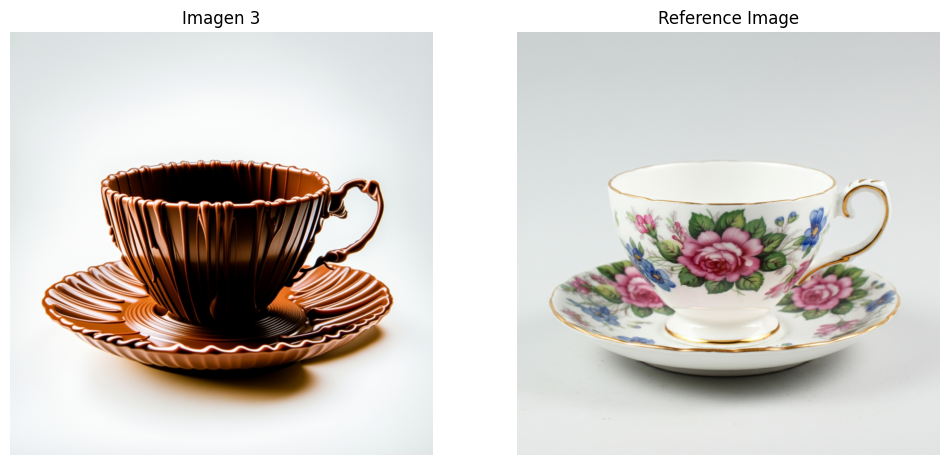

In [25]:
image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/teacup-1.png")

raw_ref_image = RawReferenceImage(reference_image=image, reference_id=1)




prompt = "transform the subject in the image so that the teacup[1] is made entirely out of chocolate"

style_image = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[raw_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_DEFAULT",
        number_of_images=1,
        seed=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/teacup-1.png"
    )
)

display_images(style_image.generated_images[0].image._pil_image, image_show)

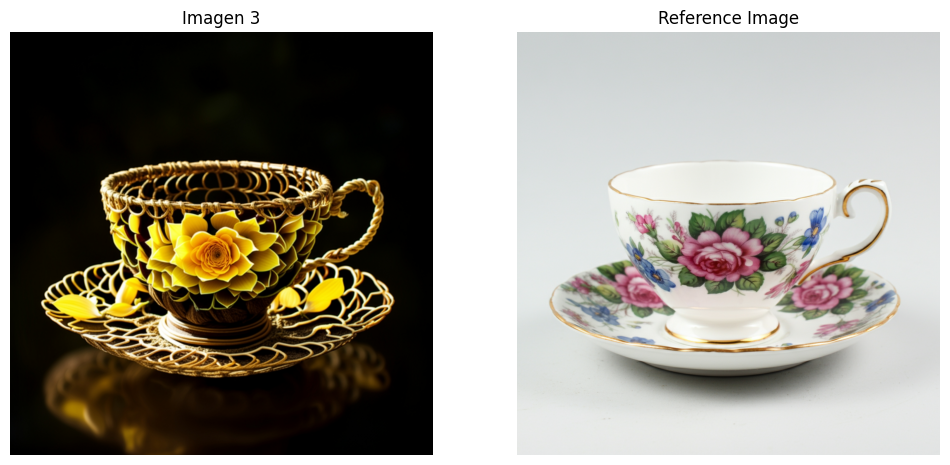

In [27]:
prompt = "transform the subject in the image so that the teacup[1] is made entirely out of non-ceramic, i.e. real chrysanthemum flowers"

style_image = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[raw_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_DEFAULT",
        number_of_images=1,
        seed=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/teacup-1.png"
    )
)

display_images(style_image.generated_images[0].image._pil_image, image_show)

### Style transfer - Edit/Customise Only

With **style transfer (eg neon signs)**, you can add reference images and craft a text prompt to transfer the style of the referenced images to new images. You can do this by creating ```StyleReferenceImage``` objects.

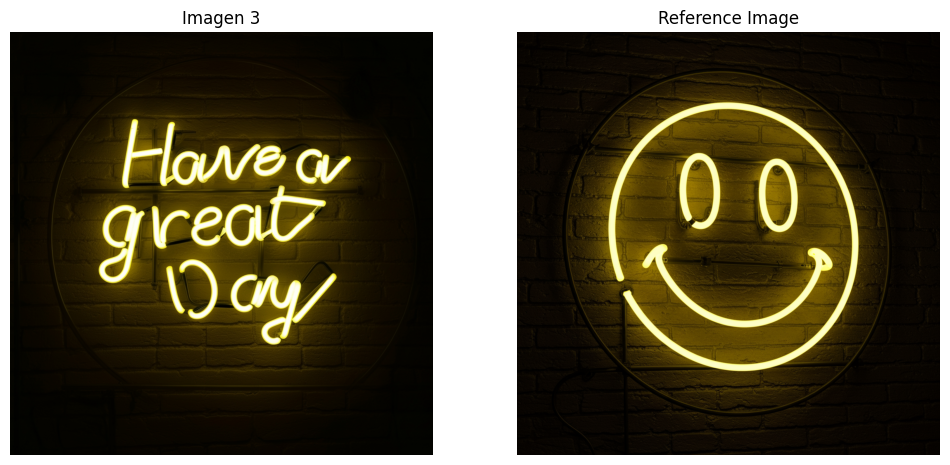

In [24]:
style_image = Image(gcs_uri="gs://cloud-samples-data/generative-ai/image/neon.png")

style_reference_image = StyleReferenceImage(
    reference_id=1,
    reference_image=style_image,
    config=StyleReferenceConfig(style_description="neon sign"),
)




prompt = "generate an image of a neon sign [1] with the words: have a great day"

style_customization = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[style_reference_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_DEFAULT",
        number_of_images=1,
        seed=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

image_show = PIL_Image.open(
    urllib.request.urlopen(
        "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/neon.png"
    )
)

display_images(style_customization.generated_images[0].image._pil_image, image_show)

### Controlled customization - Generate, then Edit/Customise

Controlled customization allows you to turn sketches into fully realized images. Imagen 3 Controlled Customization creates new images based on a source image signal or a source image (canny edge/scribble).

#### Canny edge

* Generate a new image with Imagen 3,
* apply the Canny Edge filter, and
* generate a new image based on this ```ControlReferenceImage```.


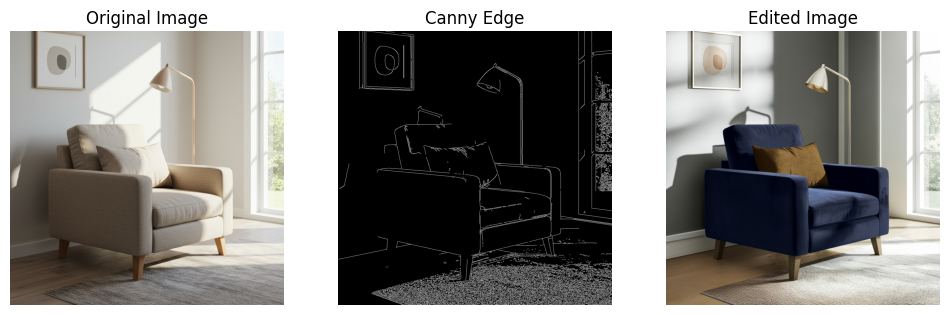

In [29]:
import cv2

###############################
# GENERATE CHAIR
###############################
generation_prompt = """
a simple accent chair in a neutral color
"""
generated_image = client.models.generate_images(
    model=generation_model,
    prompt=generation_prompt,
    config=GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

generated_image.generated_images[0].image.save("chair.png")
img = cv2.imread("chair.png")

###############################






###############################
# CANNY EDGE FILTER
###############################
# Setting parameter values
t_lower = 100  # Lower Threshold
t_upper = 150  # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)
cv2.imwrite("chair_edge.png", edge)

control_image = ControlReferenceImage(
    reference_id=1,
    reference_image=Image.from_file(location="chair_edge.png"),
    config=ControlReferenceConfig(control_type="CONTROL_TYPE_CANNY"),
)

###############################





###############################
# EDIT IMAGE
###############################
edit_prompt = "A photorealistic image of a navy suede accent chair in a living room, near big windows"

control_image = client.models.edit_image(
    model=customization_model,
    prompt=edit_prompt,
    reference_images=[control_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_CONTROLLED_EDITING",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

###############################

fig, axis = plt.subplots(1, 3, figsize=(12, 6))
axis[0].imshow(generated_image.generated_images[0].image._pil_image)
axis[0].set_title("Original Image")
axis[1].imshow(edge, cmap="gray")
axis[1].set_title("Canny Edge")
axis[2].imshow(control_image.generated_images[0].image._pil_image)
axis[2].set_title("Edited Image")
for ax in axis:
    ax.axis("off")
plt.show()

In [30]:
control_image

EditImageResponse(
  generated_images=[
    GeneratedImage(
      image=Image(
        image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x89zTXtRaw profile type iptc\x00\x00\x08\x99M\x8c1\x0e\x021\x0c\x04\xfb\xbc\xe2\x9e\x908\xeb\xb5]S\xd1Q\xf0\x81\xbb\\"!!\x81\xf8\x7fA...',
        mime_type='image/png'
      ),
      safety_attributes=SafetyAttributes()
    ),
  ],
  sdk_http_response=HttpResponse(
    headers=<dict len=9>
  )
)

In [31]:
control_image.sdk_http_response.__dict__

{'headers': {'content-type': 'application/json; charset=UTF-8',
  'vary': 'Origin, X-Origin, Referer',
  'content-encoding': 'gzip',
  'date': 'Wed, 15 Oct 2025 03:08:58 GMT',
  'server': 'scaffolding on HTTPServer2',
  'x-xss-protection': '0',
  'x-frame-options': 'SAMEORIGIN',
  'x-content-type-options': 'nosniff',
  'transfer-encoding': 'chunked'},
 'body': None}

#### Scribble

In order to use Controlled Customization with a scribble source image you need to supply a control image with a black background and white lines. Run the following cells to generate a canvas where you can draw a scribble image with your mouse. Once complete, click the 'Save Image' button, rename the file to `snippet.png` to save your scribble image locally.

In [32]:
from IPython.display import display, HTML

display(HTML("""
<canvas id="myCanvas" width="400" height="300" style="border:1px solid #000000; background-color:white;"></canvas>
<br>
<button onclick="clearCanvas()">Clear Canvas</button>
<button onclick="saveCanvas()">Save Image</button>
<div id="imageOutput"></div>
<script>
var canvas = document.getElementById("myCanvas");
var ctx = canvas.getContext("2d");
ctx.strokeStyle = "black";
ctx.lineWidth = 3;

var drawing = false;

canvas.addEventListener("mousedown", function(e) {
    drawing = true;
    ctx.beginPath();
    ctx.moveTo(e.offsetX, e.offsetY);
});

canvas.addEventListener("mousemove", function(e) {
    if (drawing) {
        ctx.lineTo(e.offsetX, e.offsetY);
        ctx.stroke();
    }
});

canvas.addEventListener("mouseup", function(e) {
    drawing = false;
});

function clearCanvas() {
    ctx.fillStyle = "white";
    ctx.fillRect(0, 0, canvas.width, canvas.height);
}

function saveCanvas() {
    var link = document.createElement('a');
    link.download = 'snippet.png';
    link.href = canvas.toDataURL();
    link.click();
}
</script>
"""))

Click on the upload icon, select the `snippet.png` file and click on __Upload__.

In the following cell, provide a description of the image you created earlier in the canvas. This description will be used as a prompt to create a new image.

In [34]:
## Provide a description of the image you've drawn
prompt = "cushioned chair with wheels in a study room" # "<prompt>" # Eg. A ball on the beach

Supply your scribble image as a ```ControlReferenceImage``` and create a new image by calling ```edit_image```.

In [35]:
!pwd

/home/jupyter


In [36]:
!ls

chair.png	genai114_imagen3_customization.ipynb  notebook_template.ipynb
chair_edge.png	generative-ai			      snippet.png


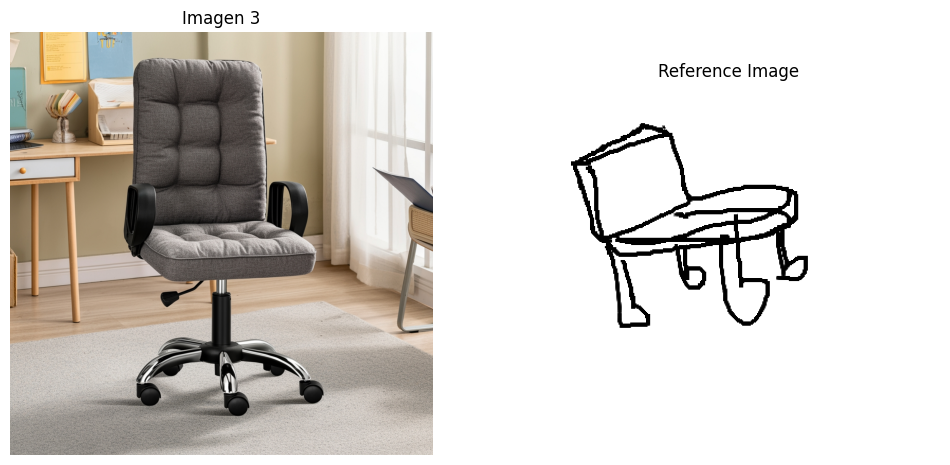

In [37]:
# earlier we 'save image' to save our line drawing to snippet.png
# now upload our snippet.png to jupyterlab
# then load into 'control_ref_image'
control_ref_image = ControlReferenceImage(
    reference_id=1,
    reference_image=Image.from_file(location="snippet.png"),
    config=ControlReferenceConfig(control_type="CONTROL_TYPE_SCRIBBLE"),
)




control_image = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[control_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_CONTROLLED_EDITING",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_images(
    control_image.generated_images[0].image._pil_image, PIL_Image.open("snippet.png")
)

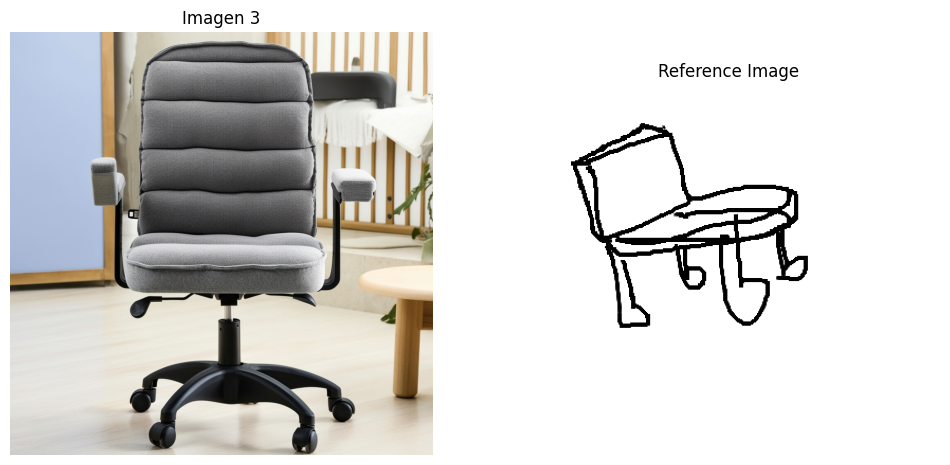

In [38]:
prompt = "cushioned chair with wheels in a study room. adjustable elbow rest. comfy cushion. chair with headrest and excellent back rest/support."
control_image = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[control_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_CONTROLLED_EDITING",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_images(
    control_image.generated_images[0].image._pil_image, PIL_Image.open("snippet.png")
)

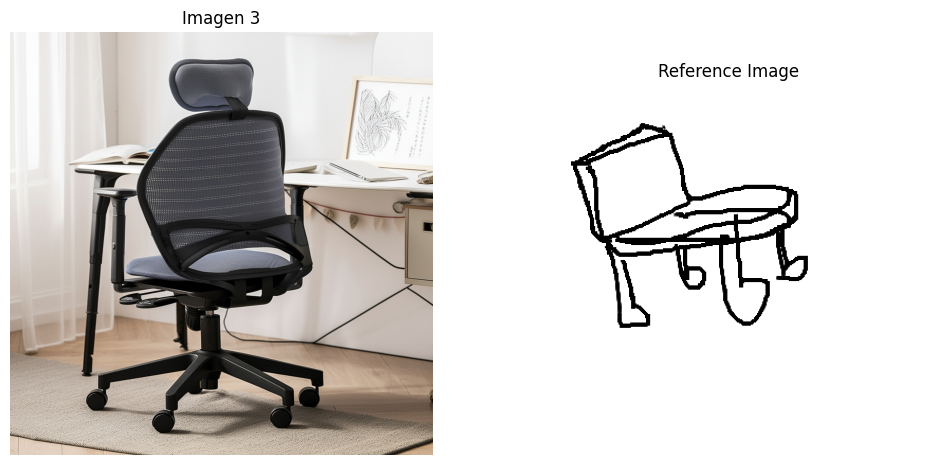

In [39]:
prompt = "chair with airy backrest to dissipate heat yet provide excellent back rest/support. chair has wheels in a study room. adjustable elbow rest. chair has a headrest, with comfy cushioned seat."
control_image = client.models.edit_image(
    model=customization_model,
    prompt=prompt,
    reference_images=[control_ref_image],
    config=EditImageConfig(
        edit_mode="EDIT_MODE_CONTROLLED_EDITING",
        number_of_images=1,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_images(
    control_image.generated_images[0].image._pil_image, PIL_Image.open("snippet.png")
)